## Online_shoppers_intention

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#checking metadata information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

#### Shape of the Dataset : 12330(instance) x 18 (features)
    


#### Dataset Contains : 10 Numerical variable , 8 categorical variable
    


#### Target variable " Revenue " is True or False . It is a binary classification problem

In [4]:
# checking for null values 

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### There is no null values present in this dataset

### UNIVARIATE ANALYSIS

In [5]:
# Since it is a classification problem we need to check class imbalance 

df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

#### The given dataset is highly imbalanced with revenue not being generated at 84.5% . We need to use oversampling technique for using the data in ML model.

In [6]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

#### 76.7 % of online Transaction happens during the weekday

In [7]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

#### Eventhough number of returning customer to the website are high, revenue conversion rate is low .

#### There might be a chance customer are taken to wrong landing page , we need to investigate further on it

In [8]:
df['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

#### 77% of web traffic is generated by 4 sources

In [9]:
df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

#### 84.5% of visitors uses only 2 type of browsers

In [10]:
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

#### 95% of visitors uses only 3 type of operating system.

In [11]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### The numerical data is Right skewed & Contain outliers

## BIVARIATE ANALYSIS

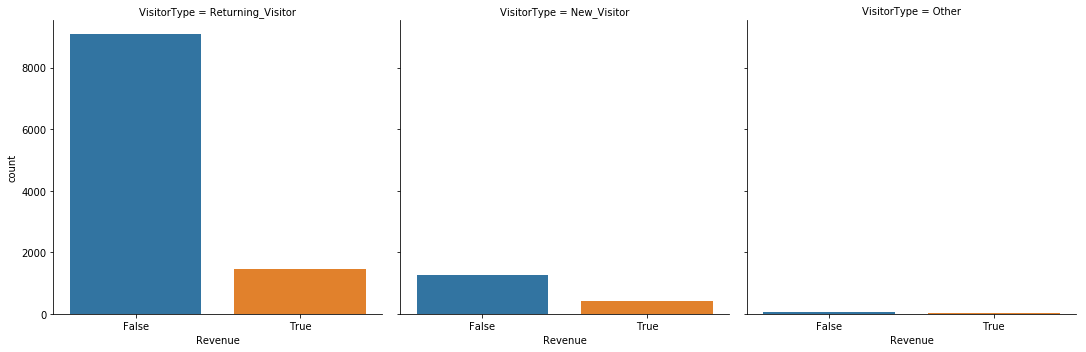

In [12]:
g = sns.catplot("Revenue", col="VisitorType", col_wrap=3,data=df,kind="count", height=5, aspect=1)

### More revenue conversion is done by Returning customer . We need to find successful Revenue conversion rate of New_visitor vs Returning customer for further understanding.

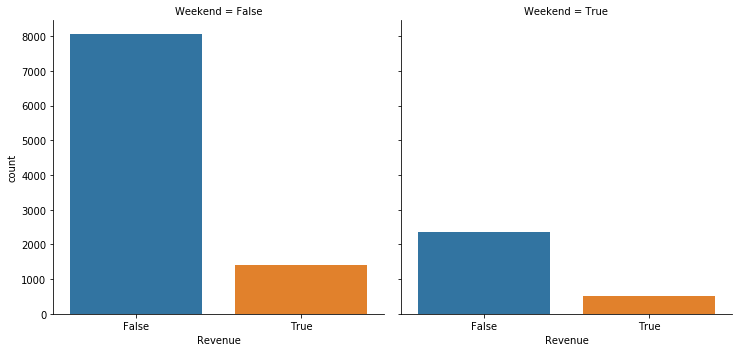

In [13]:
g = sns.catplot("Revenue", col="Weekend", col_wrap=3,data=df,kind="count", height=5, aspect=1)

### More revenue conversion is done on weekday .We need to find successful Revenue conversion rate on Weekday vs weekend for further understanding.

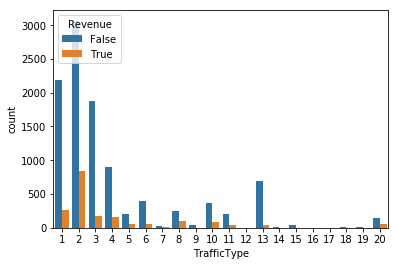

In [14]:
sns.countplot(x="TrafficType", hue="Revenue", data=df)
plt.show()

### More revenue conversion is done through the webtraffic generated from the source 2 . Eventhough source 13 generated considerable amount of webtraffic successful conversion is very low when compared to others.

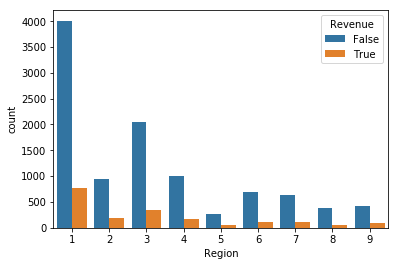

In [15]:
sns.countplot(x="Region", hue="Revenue", data=df)
plt.show()

### More revenue conversion is generated from region 1 . We need to find successful Revenue conversion rate region wise for further understanding.

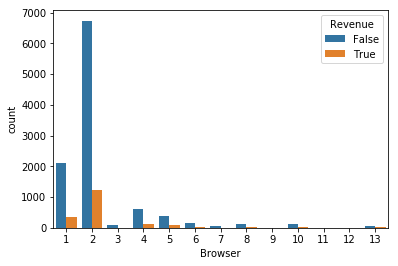

In [16]:
sns.countplot(x="Browser", hue="Revenue", data=df)
plt.show()

### More revenue generating transaction is happened from Browser 2. Eventhough Browser 1 create considerable number Session the successful conversion is low we need to investigate.

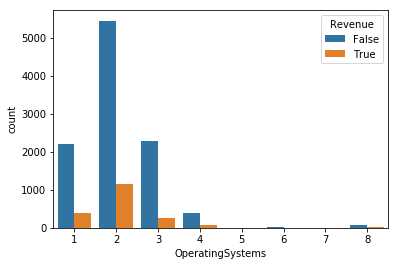

In [17]:
sns.countplot(x="OperatingSystems", hue="Revenue", data=df)
plt.show()

### More revenue generating transaction is happened from OS 2. We need to find successful Revenue conversion rate operating system wise for further understanding.

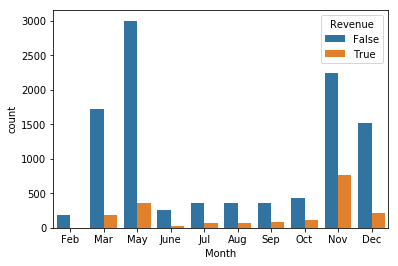

In [18]:
sns.countplot(x="Month", hue="Revenue", data=df,order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

### Website visitors may be high in May,but actual Sales conversion took place in the month of November. We need to find successful conversion rate Month wise for further understand .

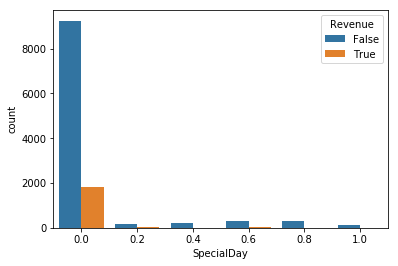

In [19]:
sns.countplot(x="SpecialDay", hue="Revenue", data=df)
plt.show()

### More number of online transaction happen during non-special time . It seems there is no relation between specialday and customer online transaction. We need to find correlation to prove it.

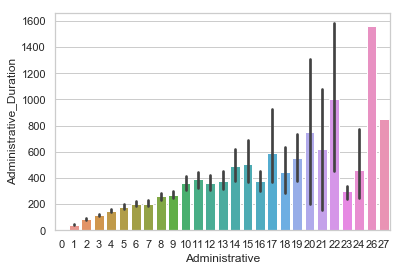

In [20]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Administrative", y="Administrative_Duration", data=df)

### With increase in number of Administrative page visit the duration increases

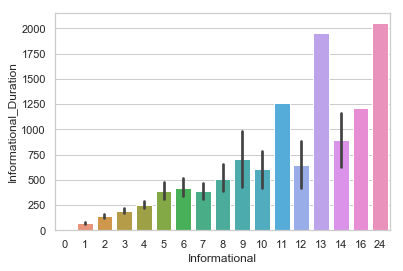

In [21]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Informational", y="Informational_Duration", data=df)

### With increase in number of information page visit the duration increases.

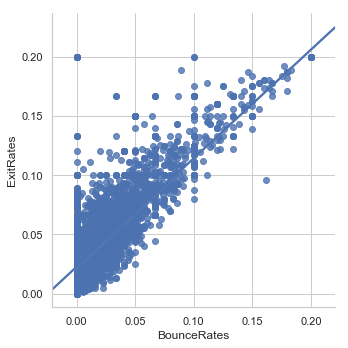

In [22]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="BounceRates", y="ExitRates", data=df)

### There is a positive correlation between Bounce Rate and Exit Rate . With increase in Bounce Rate the exit rate of page increases.

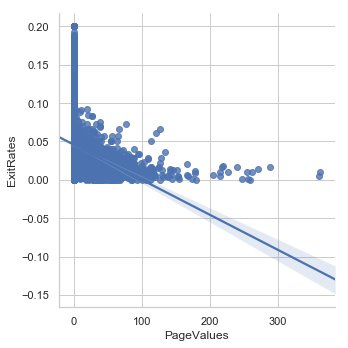

In [23]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="PageValues", y="ExitRates" , data=df)

### There is a Negative correlation between Page Value and Exit Rate . Web pages with better value the exit rate reduces.

## Data Preparation (Categorical to Numeric conversions)

In [24]:
df["Month"]=df["Month"].replace(["Jan","Feb","Mar","Apr","May","June","Jul","Aug","Sep","Oct","Nov","Dec"],
                                            list(range(1,13)))
df["Month"].unique()

array([ 2,  3,  5, 10,  6,  7,  8, 11,  9, 12], dtype=int64)

In [25]:
df["VisitorType"]=df["VisitorType"].map({'Returning_Visitor':1, 'New_Visitor':2, 'Other':3})
df["VisitorType"].unique()

array([1, 2, 3], dtype=int64)

In [26]:
df["Weekend"]=df["Weekend"].map({False:0,True:1})
df["Weekend"].unique()

array([0, 1], dtype=int64)

In [27]:
df["Revenue"]=df["Revenue"].map({False:0,True:1})
df["Revenue"].unique()

array([0, 1], dtype=int64)

In [28]:
corr_new=pd.DataFrame(df.corr().loc["Revenue",:]).sort_values(by="Revenue",ascending=False)
corr_new["abs"]=abs(corr_new["Revenue"])
corr_new.sort_values(by="abs",ascending=True)

,Revenue,abs
TrafficType,-0.005113,0.005113
Region,-0.011595,0.011595
OperatingSystems,-0.014668,0.014668
Browser,0.023984,0.023984
Weekend,0.029295,0.029295
Informational_Duration,0.070345,0.070345
SpecialDay,-0.082305,0.082305
Administrative_Duration,0.093587,0.093587
Informational,0.095200,0.095200
VisitorType,0.098485,0.098485


## MULTIVARIATE ANALYSIS

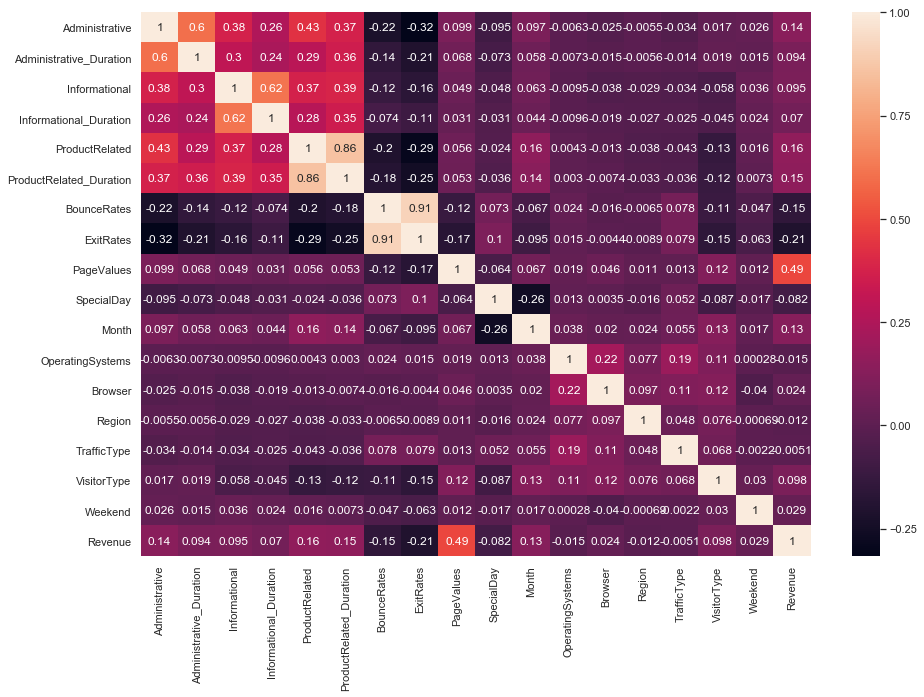

In [29]:
plt.figure(figsize = (15,10))
corr = df.corr()
sns.heatmap(corr , annot =True)
plt.show()

## Model building

In [30]:
# Seperating Independent and Target Variable
X=df.drop('Revenue',axis=1)
y=df['Revenue']

In [31]:
x = X.copy()
Y = y.copy()

In [32]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)
print('shape of X_train data :',X_train.shape)
print('shape of y_train data :',y_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

shape of X_train data : (8631, 17)
shape of y_train data : (8631,)
Shape of x_test : (3699, 17)
Shape of y_test : (3699,)


### LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [35]:
log_reg= LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,roc_auc_score

In [37]:
print("The accuracy",accuracy_score(y_test,y_pred))
print("Recall ",recall_score(y_test, y_pred, average="weighted"))
print("Precision ",precision_score(y_test, y_pred, average="weighted"))
print("f1_score ",f1_score(y_test, y_pred, average="weighted"))

The accuracy 0.8848337388483374
Recall  0.8848337388483374
Precision  0.8720671672270334
f1_score  0.8662571244091319


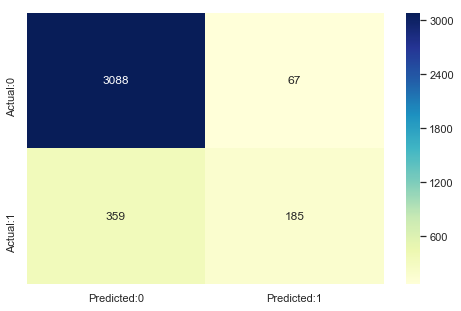

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [39]:
print("classification_report",classification_report(y_test,y_pred))

classification_report               precision    recall  f1-score   support

           0       0.90      0.98      0.94      3155
           1       0.73      0.34      0.46       544

    accuracy                           0.88      3699
   macro avg       0.81      0.66      0.70      3699
weighted avg       0.87      0.88      0.87      3699



In [40]:
# Before oversampling , Target Variable is highly imbalanced 
np.bincount(y)

array([10422,  1908], dtype=int64)

## Oversampling of Data to avoid Class imbalance ( USING SMOTE).

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
smt = SMOTE()
X_sm, y_sm = smt.fit_sample(X,y)
np.bincount(y_sm)

array([10422, 10422], dtype=int64)

### After oversampling the Target Variable is Balanced.

### Train-Test Split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,train_size=0.7,random_state=100)
print('shape of X_train data :',X_train.shape)
print('shape of y_train data :',y_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

shape of X_train data : (14590, 17)
shape of y_train data : (14590,)
Shape of x_test : (6254, 17)
Shape of y_test : (6254,)


## Logistic Regression Model Building.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [45]:
log_reg= LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred = log_reg.predict(X_test)

In [47]:
# Predicted probabilities
y_pred_proba = log_reg.predict_proba(X_test)

In [48]:
print("The accuracy",accuracy_score(y_test,y_pred))
print("Recall ",recall_score(y_test, y_pred, average="weighted"))
print("Precision ",precision_score(y_test, y_pred, average="weighted"))
print("f1_score ",f1_score(y_test, y_pred, average="weighted"))

The accuracy 0.8234729772945315
Recall  0.8234729772945315
Precision  0.8284954123499928
f1_score  0.822557145551736


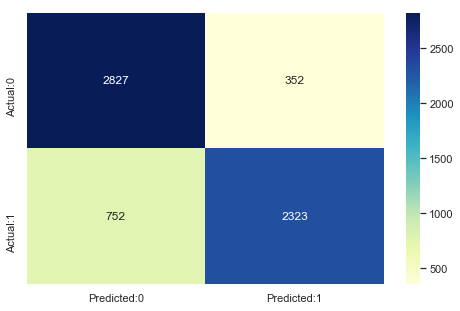

In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

#### From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.

In [50]:
# classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      3179
           1       0.87      0.76      0.81      3075

    accuracy                           0.82      6254
   macro avg       0.83      0.82      0.82      6254
weighted avg       0.83      0.82      0.82      6254



## ROC curve

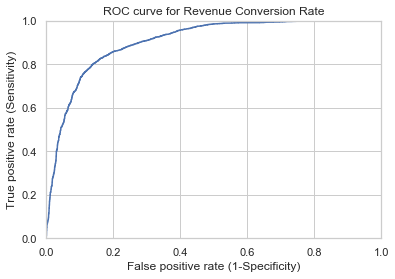

In [51]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Revenue Conversion Rate')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

## AUC

In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba[:,1])

0.9050571202786579

## DecisionTreeClassifier Model Building

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [54]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [55]:
y_pred = dtc.predict(X_test)

In [56]:
# Predicted probabilities
y_pred_proba = dtc.predict_proba(X_test)

In [57]:
print("The accuracy",accuracy_score(y_test,y_pred))
print("Recall ",recall_score(y_test, y_pred, average="weighted"))
print("Precision ",precision_score(y_test, y_pred, average="weighted"))
print("f1_score ",f1_score(y_test, y_pred, average="weighted"))

The accuracy 0.9010233450591622
Recall  0.9010233450591622
Precision  0.9010989678146619
f1_score  0.9010296190429558


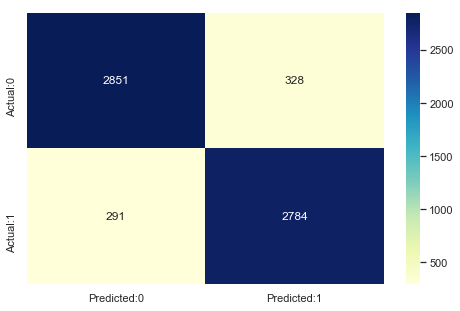

In [58]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [59]:
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      3179
           1       0.89      0.91      0.90      3075

    accuracy                           0.90      6254
   macro avg       0.90      0.90      0.90      6254
weighted avg       0.90      0.90      0.90      6254



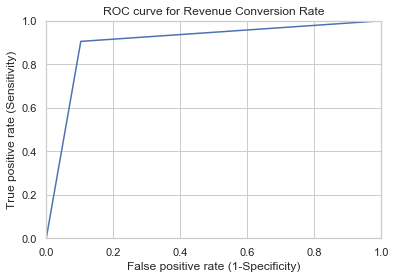

In [60]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Revenue Conversion Rate')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

## AUC

In [61]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba[:,1])

0.9010943769708222

## RandomForest Classifier Model Building

In [62]:
# MODELLING
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [63]:
rf = RandomForestClassifier( n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
y_pred =rf.predict(X_test)

In [65]:
# Predicted probabilities
y_pred_proba = rf.predict_proba(X_test)

In [66]:
print("The accuracy",accuracy_score(y_test,y_pred))
print("Recall ",recall_score(y_test, y_pred, average="weighted"))
print("Precision ",precision_score(y_test, y_pred, average="weighted"))
print("f1_score ",f1_score(y_test, y_pred, average="weighted"))

The accuracy 0.9373201151263192
Recall  0.9373201151263192
Precision  0.9381197866349318
f1_score  0.9373146984031254


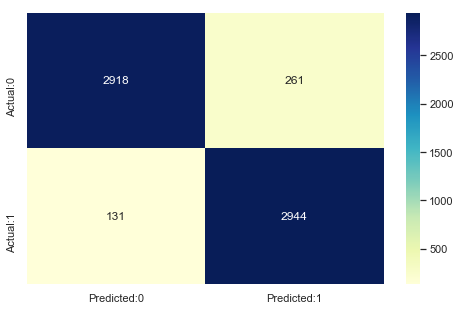

In [67]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [68]:
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3179
           1       0.92      0.96      0.94      3075

    accuracy                           0.94      6254
   macro avg       0.94      0.94      0.94      6254
weighted avg       0.94      0.94      0.94      6254



## ROC curve

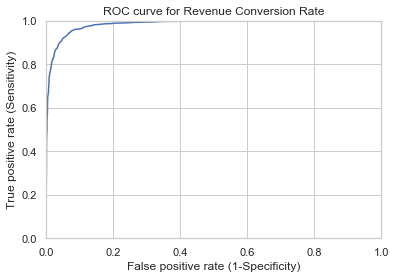

In [69]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Revenue Conversion Rate')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

## AUC

In [70]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba[:,1])

0.9845082950357658

## KNN Classifier Model Building.

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [72]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [73]:
y_pred = knn.predict(X_test)

In [74]:
# Predicted probabilities
y_pred_proba = knn.predict_proba(X_test)

In [75]:
print("The accuracy",accuracy_score(y_test,y_pred))
print("Recall ",recall_score(y_test, y_pred, average="weighted"))
print("Precision ",precision_score(y_test, y_pred, average="weighted"))
print("f1_score ",f1_score(y_test, y_pred, average="weighted"))

The accuracy 0.8872721458266709
Recall  0.8872721458266709
Precision  0.9019957454836498
f1_score  0.886431249759589


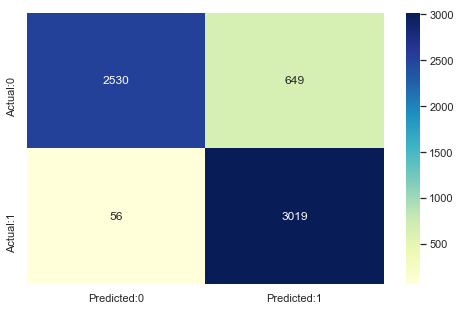

In [76]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [77]:
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      3179
           1       0.82      0.98      0.90      3075

    accuracy                           0.89      6254
   macro avg       0.90      0.89      0.89      6254
weighted avg       0.90      0.89      0.89      6254



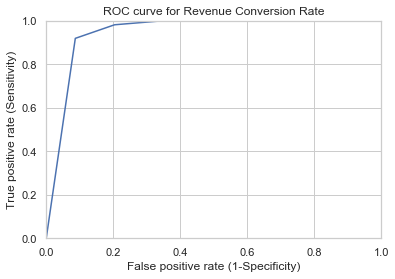

In [78]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Revenue Conversion Rate')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

## AUC

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba[:,1])

0.9453527595986876

### NBC Modeling

In [80]:
from sklearn.naive_bayes import BernoulliNB

In [81]:
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [82]:
y_pred = classifier.predict(X_test)

In [83]:
# Predicted probabilities
y_pred_proba = classifier.predict_proba(X_test)

In [84]:
print("The accuracy",accuracy_score(y_test,y_pred))
print("Recall ",recall_score(y_test, y_pred, average="weighted"))
print("Precision ",precision_score(y_test, y_pred, average="weighted"))
print("f1_score ",f1_score(y_test, y_pred, average="weighted"))

The accuracy 0.7972497601535018
Recall  0.7972497601535018
Precision  0.7993305532295213
f1_score  0.7970725938302436


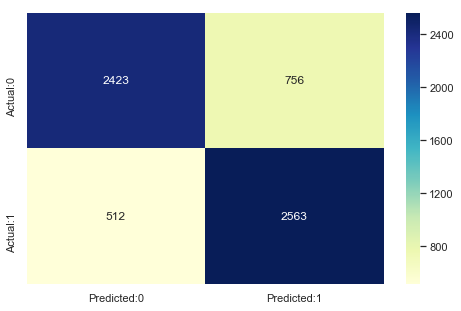

In [85]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [86]:
# classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      3179
           1       0.77      0.83      0.80      3075

    accuracy                           0.80      6254
   macro avg       0.80      0.80      0.80      6254
weighted avg       0.80      0.80      0.80      6254



#### ROC Curve

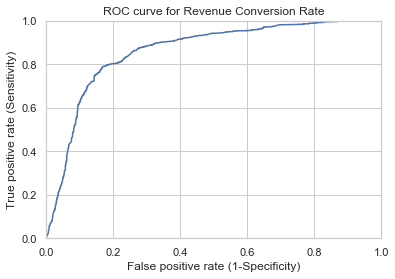

In [87]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Revenue Conversion Rate')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

## AUC

In [88]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba[:,1])

0.8609490124470291

### SVC Modeling

In [89]:
# MODELLING

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc_mod = SVC(gamma='scale')
svc_mod.fit(X_train, y_train)

y_pred = svc_mod.predict(X_test)

# evaluating the model
print("Training Accuracy :", svc_mod.score(X_train, y_train))
print("Testing Accuracy :", svc_mod.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.8747087045921864
Testing Accuracy : 0.8623281100095939
[[2824  355]
 [ 506 2569]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3179
           1       0.88      0.84      0.86      3075

    accuracy                           0.86      6254
   macro avg       0.86      0.86      0.86      6254
weighted avg       0.86      0.86      0.86      6254



### Final

In [90]:
mod = []

mod.append(('LR', LogisticRegression()))
mod.append(('DT', DecisionTreeClassifier()))
mod.append(('RF', RandomForestClassifier(n_estimators=10)))
mod.append(('KNN', KNeighborsClassifier()))
mod.append(('NB', BernoulliNB()))


def evaluation(modelx):
        
        fit = modelx.fit(X_train,y_train)
    
        y_pred= fit.predict(X_test)
    
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test, y_pred, average="weighted")
    
        return accuracy
    
    
results2 = []
names2 = []
for name,model in mod:
    a = evaluation(model)
    results2.append(a)
    names2.append(name)
    print('The accuracy of ',name,' is : ',a) 

results3 = []

for i in results2:
    results3.append([i])

The accuracy of  LR  is :  0.8234729772945315
The accuracy of  DT  is :  0.9002238567316917
The accuracy of  RF  is :  0.9282059481931564
The accuracy of  KNN  is :  0.8730412535976975
The accuracy of  NB  is :  0.7972497601535018


## Ensemble Methods:

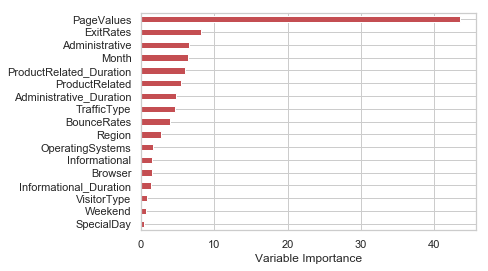

In [91]:
import matplotlib.pyplot as plt
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=x.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [92]:
Importance

,Importance
Administrative,6.563076
Administrative_Duration,4.712518
Informational,1.539169
Informational_Duration,1.366869
ProductRelated,5.505895
ProductRelated_Duration,6.045602
BounceRates,3.906392
ExitRates,8.166179
PageValues,43.477731
SpecialDay,0.416714


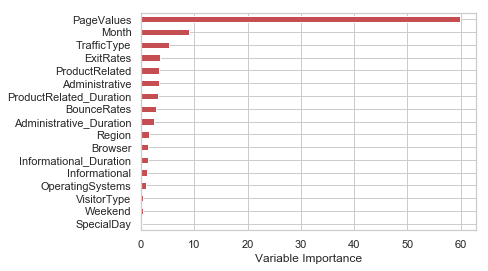

In [93]:
import matplotlib.pyplot as plt
Importance = pd.DataFrame({'Importance':dtc.feature_importances_*100}, index=x.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [94]:
Importance

,Importance
Administrative,3.313818
Administrative_Duration,2.523457
Informational,1.207160
Informational_Duration,1.273383
ProductRelated,3.384019
ProductRelated_Duration,3.247956
BounceRates,2.743610
ExitRates,3.649807
PageValues,59.820245
SpecialDay,0.173621


In [95]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [96]:
X=df[['Administrative', 'Administrative_Duration', 'Informational','ProductRelated', 'ProductRelated_Duration',
     'BounceRates', 'ExitRates', 'PageValues','Month','OperatingSystems', 'Browser', 'Region', 'TrafficType','Informational_Duration']]
y=df['Revenue']
smt = SMOTE()
X,y = smt.fit_sample(X,y)
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.7,random_state=100)

In [97]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import itertools

In [98]:
def imb_predict(algo,xtrain,ytrain,xtest,ytest):
    
    algo.fit(xtrain,ytrain)
    ypred=algo.predict(xtest)
    yprob=algo.predict_proba(xtest)[:,1]
    
    acc=accuracy_score(ytest,ypred)
    print('Accuracy Score: ',acc)
    
    con = confusion_matrix(ytest,ypred)
    print('Confusion matrix: ',con)

In [99]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression(solver='liblinear')

imb_predict(logi,xtrain,ytrain,xtest,ytest)

Accuracy Score:  0.8292292932523185
Confusion matrix:  [[2845  334]
 [ 734 2341]]


In [100]:
from sklearn.linear_model import LogisticRegression
rf=RandomForestClassifier()

imb_predict(rf,xtrain,ytrain,xtest,ytest)

Accuracy Score:  0.9310841061720498
Confusion matrix:  [[2954  225]
 [ 206 2869]]


In [101]:
from sklearn.neighbors import KNeighborsClassifier     
knn = KNeighborsClassifier()
imb_predict(knn,xtrain,ytrain,xtest,ytest)

Accuracy Score:  0.858810361368724
Confusion matrix:  [[2499  680]
 [ 203 2872]]


In [102]:
from sklearn.tree import DecisionTreeClassifier      
dtree=DecisionTreeClassifier(max_depth=5)
imb_predict(dtree,xtrain,ytrain,xtest,ytest)

Accuracy Score:  0.8957467220978573
Confusion matrix:  [[2911  268]
 [ 384 2691]]


In [103]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
imb_predict(classifier,xtrain,ytrain,xtest,ytest)

Accuracy Score:  0.7601535017588743
Confusion matrix:  [[2722  457]
 [1043 2032]]


### Bagging

In [104]:
#BAGGING
bagging1 = BaggingClassifier(base_estimator=logi, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=knn, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging3 = BaggingClassifier(base_estimator=dtree, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging4 = BaggingClassifier(base_estimator=classifier, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging5 = BaggingClassifier(base_estimator=rf, n_estimators=10, max_samples=0.8, max_features=0.8)
label = ['logistic_Regression','lr_bag','knn','knn_bag','Decision_tree','dtree_bag','naive','navie_bag','rf','rf_bag']
clf_list = [logi,bagging1,knn,bagging2,dtree,bagging3,classifier,bagging4,rf,bagging5]
grid = itertools.product([0,1],repeat=4)

for clf, label, grd in zip(clf_list, label, grid):        
    scores =cross_val_score(clf, xtrain, ytrain, cv=3, scoring='accuracy')
    print ("Accuracy: %.4f (+/- %.4f) [%s]" %(scores.mean(), scores.std(), label)) 

Accuracy: 0.8404 (+/- 0.0051) [logistic_Regression]
Accuracy: 0.8400 (+/- 0.0055) [lr_bag]
Accuracy: 0.8331 (+/- 0.0066) [knn]
Accuracy: 0.8543 (+/- 0.0043) [knn_bag]
Accuracy: 0.8976 (+/- 0.0052) [Decision_tree]
Accuracy: 0.9080 (+/- 0.0098) [dtree_bag]
Accuracy: 0.7641 (+/- 0.0078) [naive]
Accuracy: 0.7766 (+/- 0.0050) [navie_bag]
Accuracy: 0.9252 (+/- 0.0019) [rf]
Accuracy: 0.9293 (+/- 0.0027) [rf_bag]


### Boosting

In [105]:
boster1 = AdaBoostClassifier(base_estimator=logi, n_estimators=10)
boster2 = AdaBoostClassifier(base_estimator=dtree, n_estimators=10)
boster3 = AdaBoostClassifier(base_estimator=classifier, n_estimators=10)
boster4 = AdaBoostClassifier(base_estimator=rf, n_estimators=10)
label = ['logistic_Regression','lr_boost','Decision_tree','dtree_boost','naive','navie_boost','rf','rf_boost']
clf_list = [logi,boster1,dtree,boster2,classifier,boster3,rf,boster4]
grid = itertools.product([0,1],repeat=4)

for clf, label, grd in zip(clf_list, label, grid):        
    scores =cross_val_score(clf, xtrain, ytrain, cv=3, scoring='accuracy')
    print ("Accuracy: %.4f (+/- %.4f) [%s]" %(scores.mean(), scores.std(), label)) 

Accuracy: 0.8404 (+/- 0.0051) [logistic_Regression]
Accuracy: 0.7979 (+/- 0.0076) [lr_boost]
Accuracy: 0.8976 (+/- 0.0052) [Decision_tree]
Accuracy: 0.9260 (+/- 0.0029) [dtree_boost]
Accuracy: 0.7641 (+/- 0.0078) [naive]
Accuracy: 0.5171 (+/- 0.0596) [navie_boost]
Accuracy: 0.9271 (+/- 0.0034) [rf]
Accuracy: 0.9336 (+/- 0.0031) [rf_boost]
